# King County House Price Prediction Model

## Import Necessary Functions and Packages


In [1]:
from func.data_importer import file_reader
from func.preprocess import feature_wrangler, outlier_remover, cat_encoder, vif_screener
from func.visualize import corr_plot, corr_table, num_feature_plot, target_plot, cat_feature_plot, acf_plot, norm_plot, feature_importance
import math
import pickle, pylab
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats import diagnostic as diag
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## Import King County Housing Dataset

In [2]:
data = file_reader('https://raw.githubusercontent.com/Amberlynnyandow/dsc-1-final-project-online-ds-ft-021119/master/kc_house_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Preprocessing 

### Missing Values and Datatype Transformation

In [3]:
data_wrangled = feature_wrangler(data)
data_wrangled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  float64
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  object 
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
dtypes: float64(6), int64(7), object(4)
memory

### Remove Outliers

In [4]:
data_no_outliers = outlier_remover(data_wrangled)
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18603 entries, 7129300520 to 1523300157
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18603 non-null  float64
 1   bedrooms       18603 non-null  int64  
 2   bathrooms      18603 non-null  float64
 3   sqft_living    18603 non-null  int64  
 4   sqft_lot       18603 non-null  int64  
 5   floors         18603 non-null  float64
 6   waterfront     18603 non-null  object 
 7   view           18603 non-null  float64
 8   condition      18603 non-null  object 
 9   grade          18603 non-null  object 
 10  sqft_above     18603 non-null  int64  
 11  sqft_basement  18603 non-null  float64
 12  yr_built       18603 non-null  int64  
 13  yr_renovated   18603 non-null  float64
 14  zipcode        18603 non-null  object 
 15  sqft_living15  18603 non-null  int64  
 16  sqft_lot15     18603 non-null  int64  
dtypes: float64(6), int64(7), object(4)
memory

### Categorical Encoding 

In [5]:
data_cat_encoded = cat_encoder(data_no_outliers)
data_cat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18603 entries, 7129300520 to 1523300157
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18603 non-null  float64
 1   bedrooms       18603 non-null  int64  
 2   bathrooms      18603 non-null  float64
 3   sqft_living    18603 non-null  int64  
 4   sqft_lot       18603 non-null  int64  
 5   floors         18603 non-null  float64
 6   waterfront     18603 non-null  float64
 7   view           18603 non-null  float64
 8   condition      18603 non-null  float64
 9   grade          18603 non-null  float64
 10  sqft_above     18603 non-null  int64  
 11  sqft_basement  18603 non-null  float64
 12  yr_built       18603 non-null  int64  
 13  yr_renovated   18603 non-null  float64
 14  zipcode        18603 non-null  float64
 15  sqft_living15  18603 non-null  int64  
 16  sqft_lot15     18603 non-null  int64  
dtypes: float64(10), int64(7)
memory usage: 2.

### Multicollinearity Check and Handling

In [6]:
data_post_vif = vif_screener(data_cat_encoded)
data_post_vif.info()

VIF BEFORE DROPPING HIGHLY CORRELATED COLUMNS COLUMNS
-------------------------------------------------------


const            321124.818104
price                 4.939525
bedrooms              1.737452
bathrooms             3.069099
sqft_living         141.237703
sqft_lot              2.970671
floors                2.164266
waterfront            1.004289
view                  1.089651
condition             1.044621
grade                 3.118471
sqft_above          129.475459
sqft_basement        39.048804
yr_built              2.231122
yr_renovated          1.001569
zipcode               2.806796
sqft_living15         2.774757
sqft_lot15            3.113594
dtype: float64

VIF AFTER DROPPING HIGHLY CORRELATED COLUMNS COLUMNS
-------------------------------------------------------


const            321038.839754
price                 4.357973
bedrooms              1.453284
bathrooms             2.598785
sqft_lot              2.965945
floors                1.718379
waterfront            1.003982
view                  1.071640
condition             1.042887
grade                 2.954718
yr_built              2.203421
yr_renovated          1.001544
zipcode               2.517548
sqft_living15         2.229899
sqft_lot15            3.102936
dtype: float64

<class 'pandas.core.frame.DataFrame'>
Index: 18603 entries, 7129300520 to 1523300157
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18603 non-null  float64
 1   bedrooms       18603 non-null  int64  
 2   bathrooms      18603 non-null  float64
 3   sqft_lot       18603 non-null  int64  
 4   floors         18603 non-null  float64
 5   waterfront     18603 non-null  float64
 6   view           18603 non-null  float64
 7   condition      18603 non-null  float64
 8   grade          18603 non-null  float64
 9   yr_built       18603 non-null  int64  
 10  yr_renovated   18603 non-null  float64
 11  zipcode        18603 non-null  float64
 12  sqft_living15  18603 non-null  int64  
 13  sqft_lot15     18603 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.1 MB


## Data Visualizations

### Distribution of Target

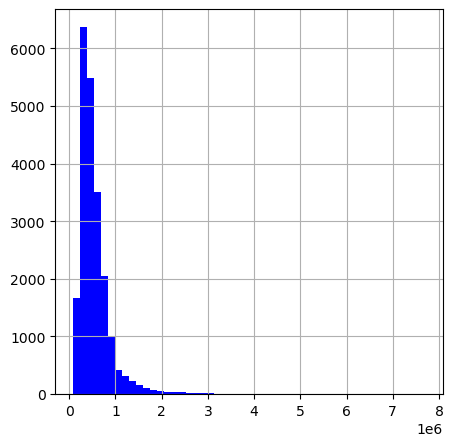

In [7]:
target_plot(data_wrangled);

### Distribution of Categorical Labels

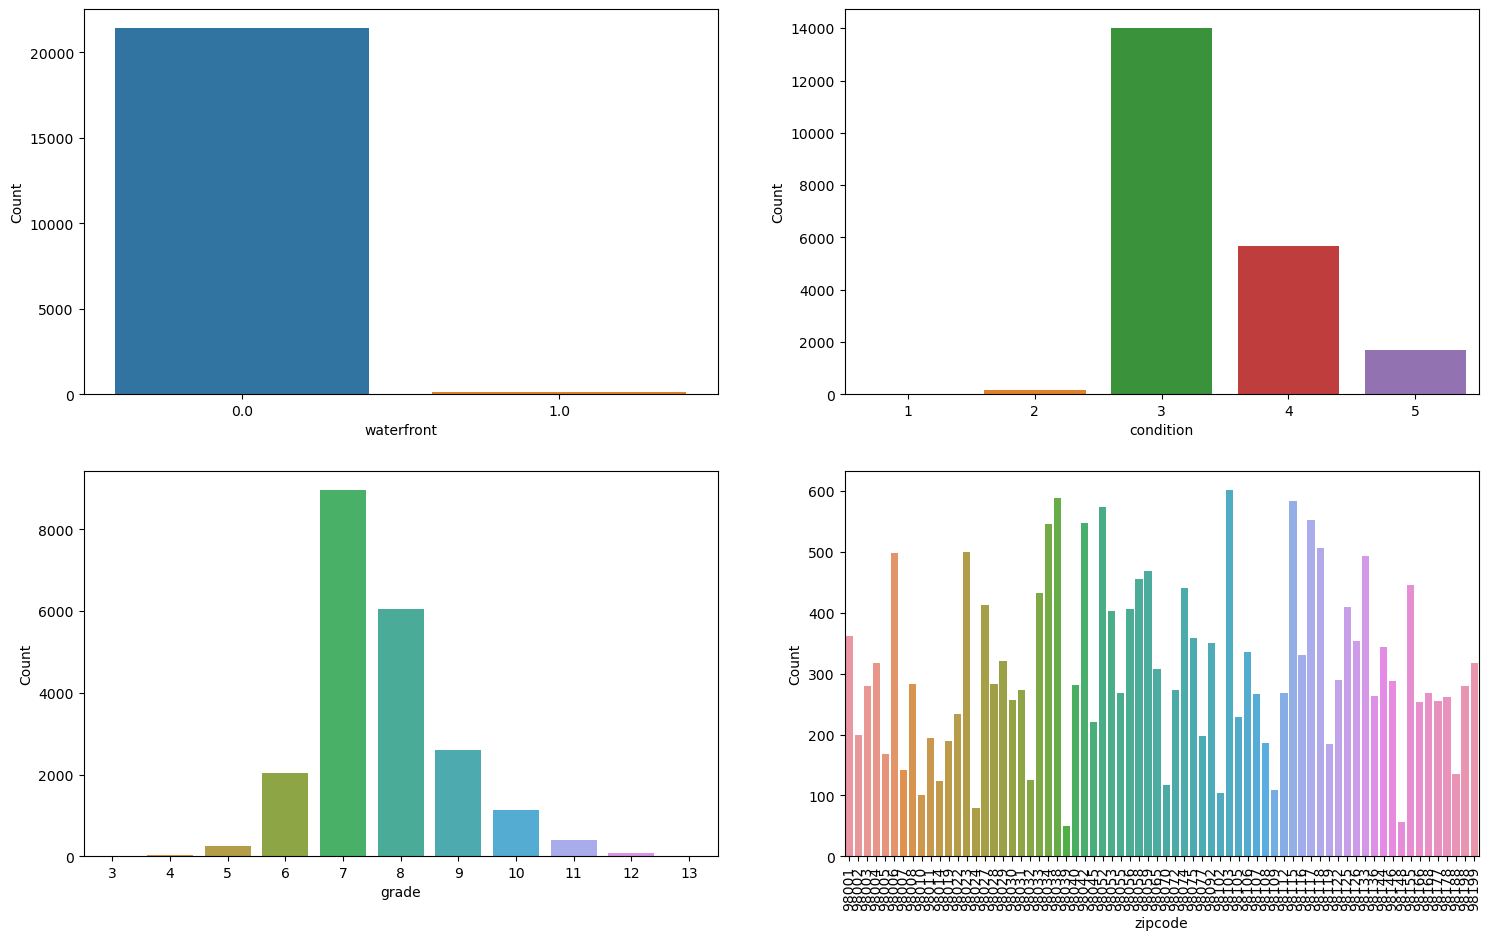

In [8]:
cat_feature_plot(data_wrangled)

### Distribution of Numeric Labels

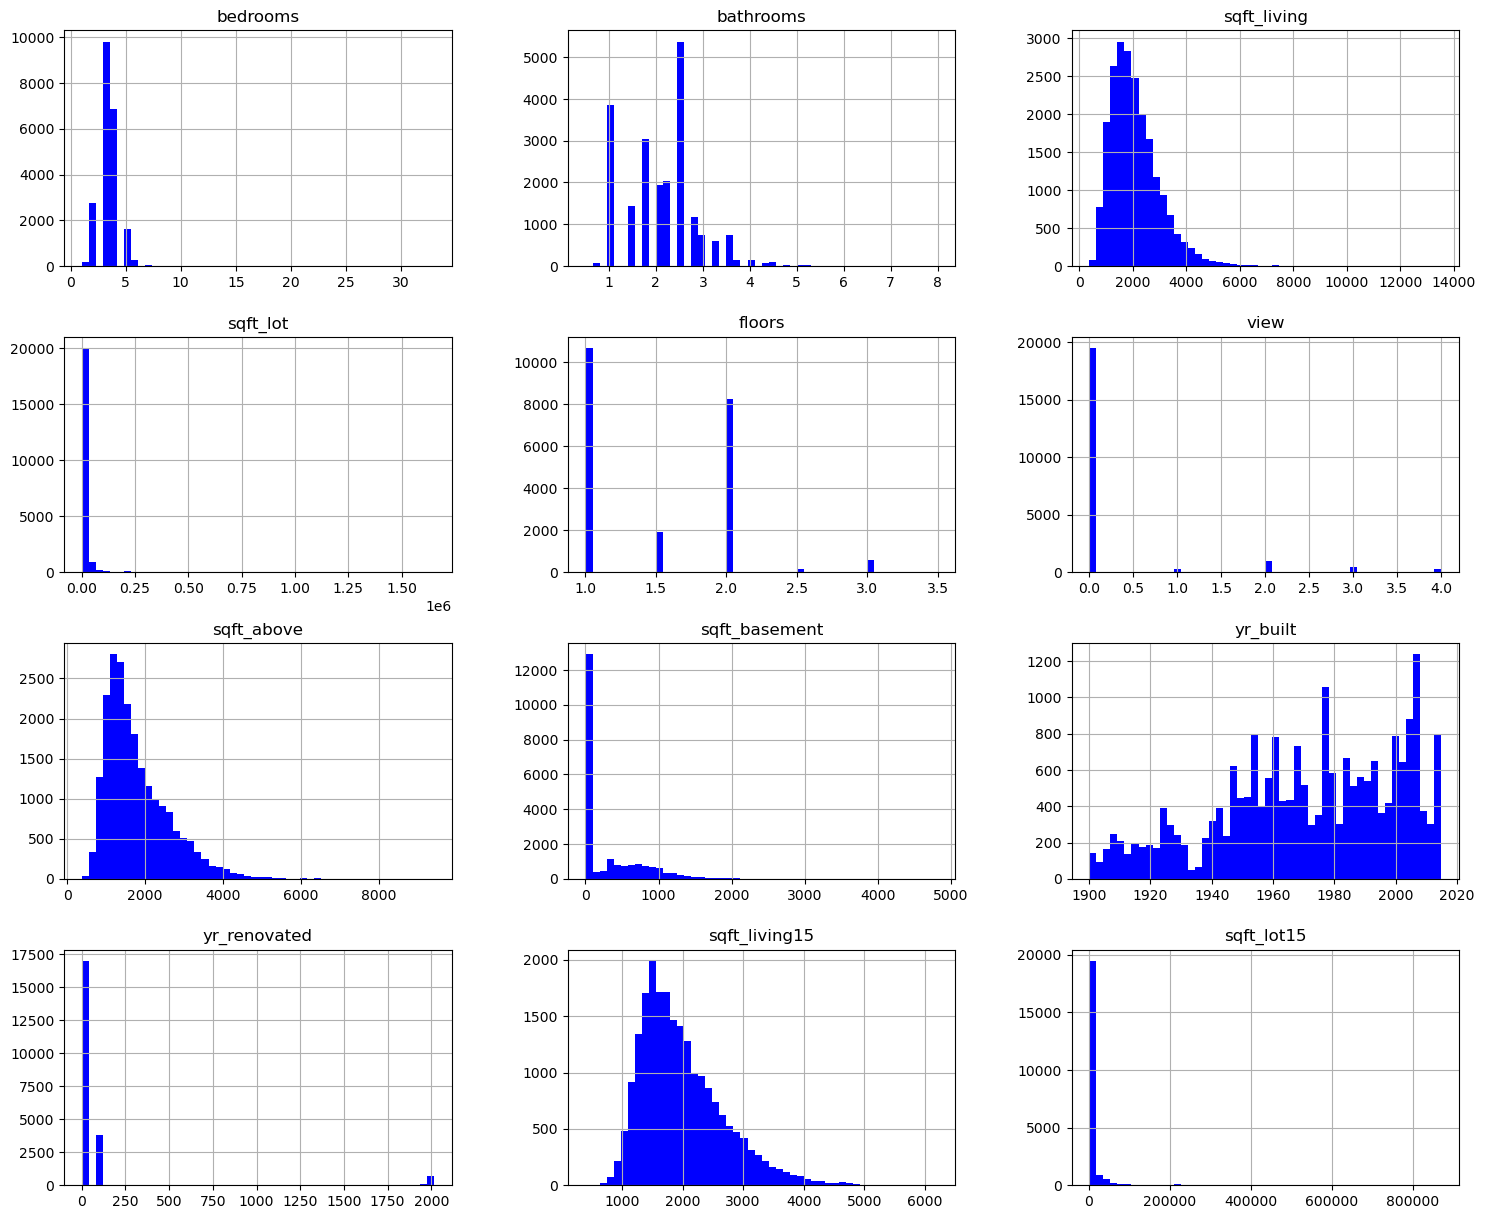

In [9]:
num_feature_plot(data_wrangled);

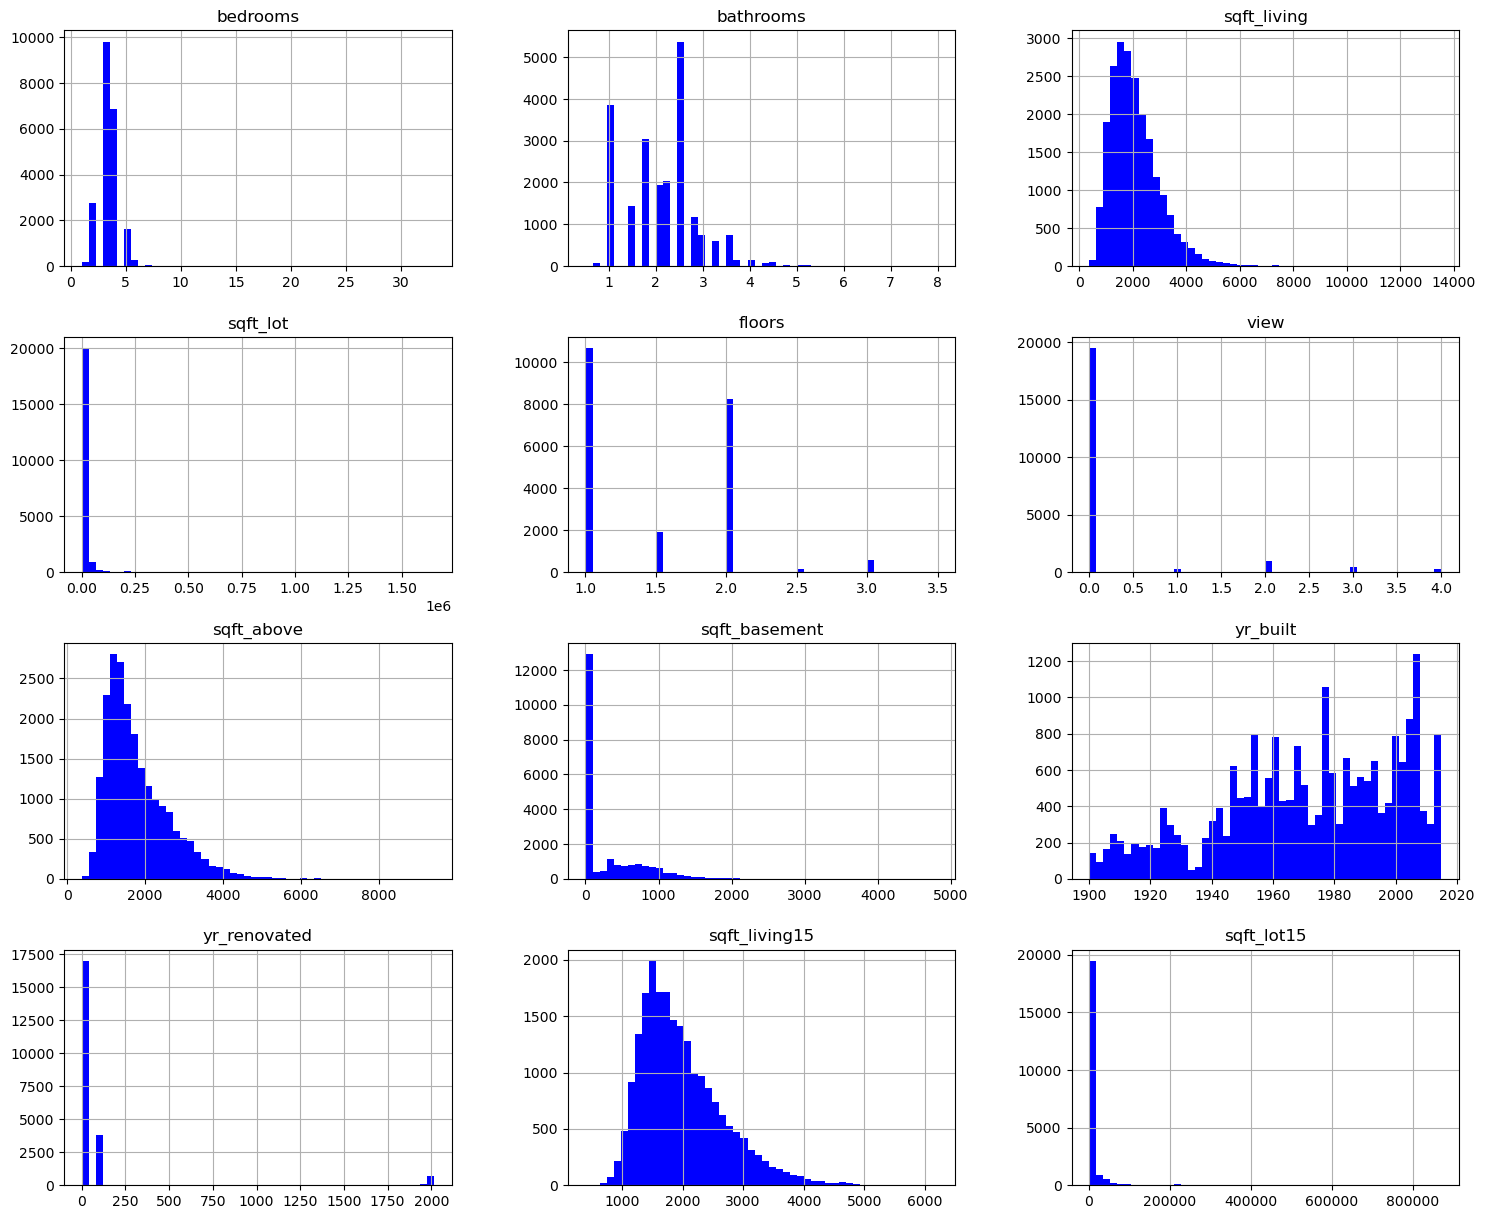

In [10]:
num_feature_plot(data_wrangled);

### Correlation of Features (Plot or Table can be Used)

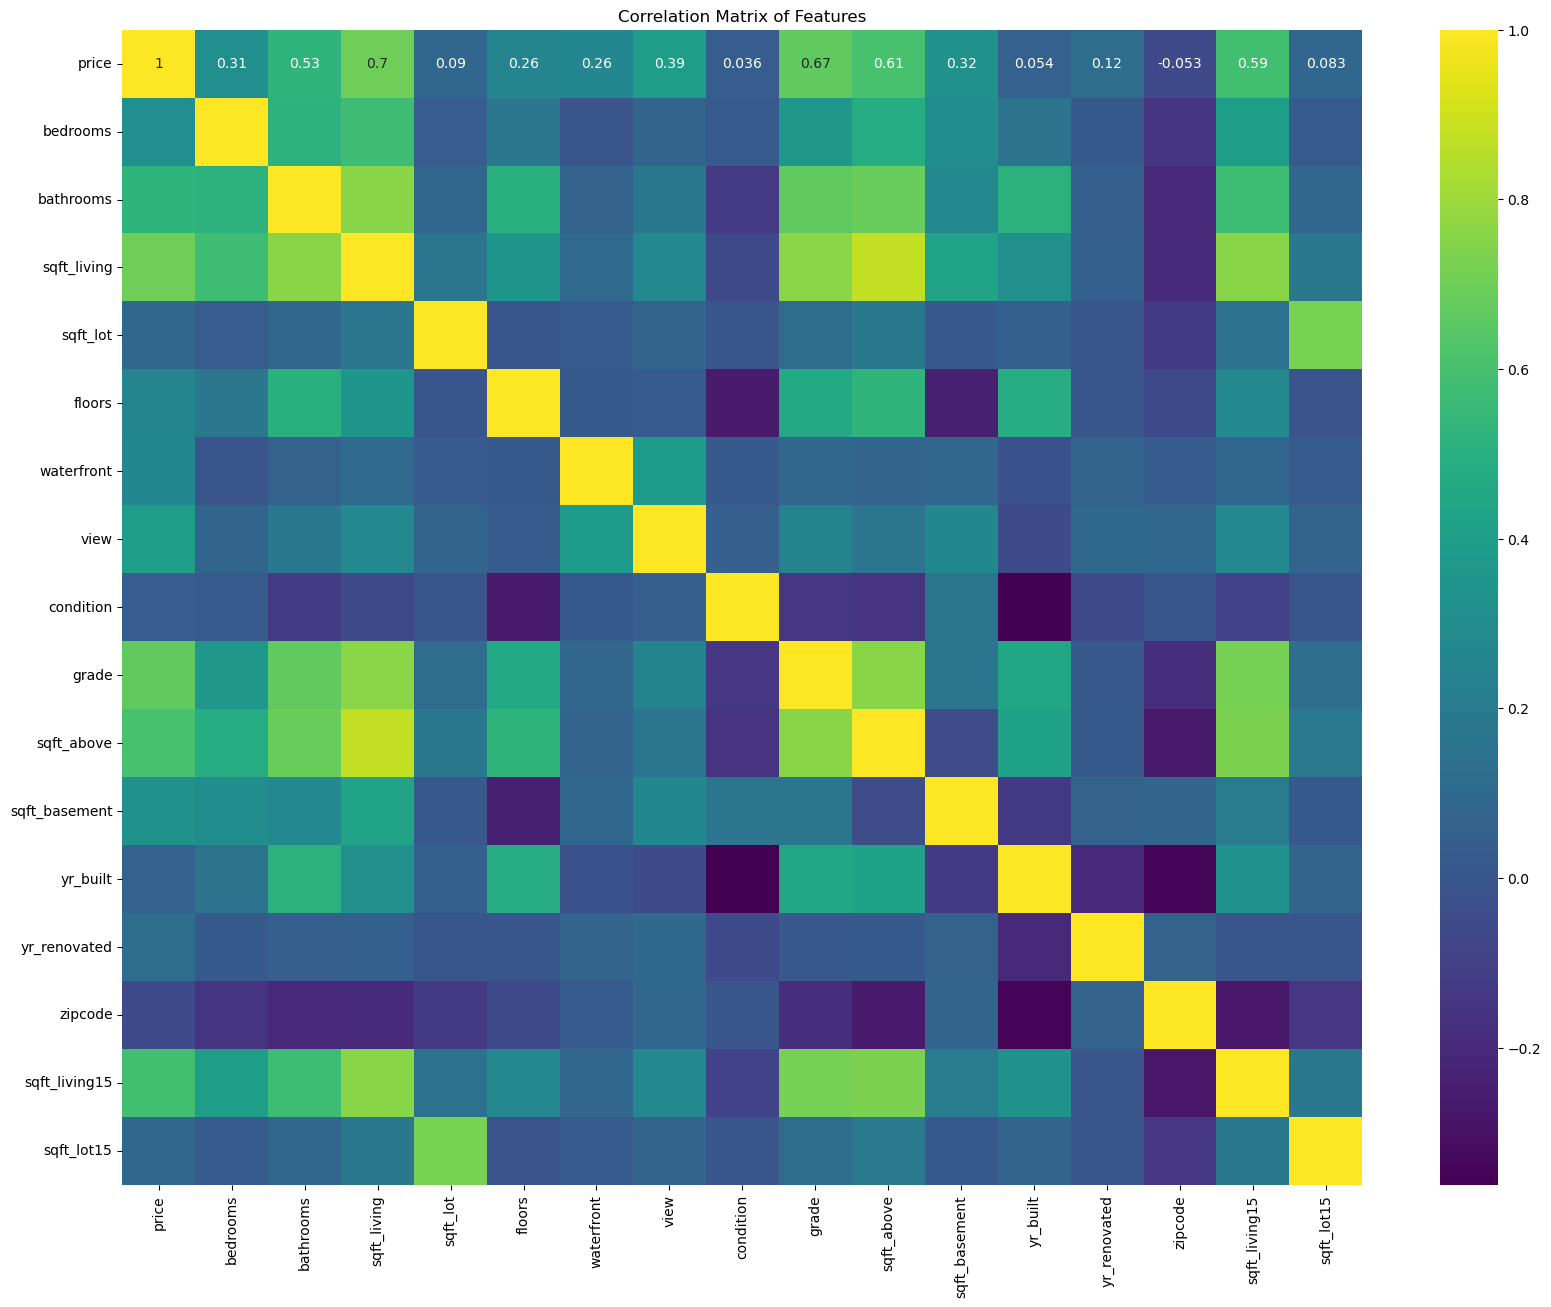

In [11]:
corr_plot(data_wrangled)
#or
#corr_table(data_wrangled)

## Data Split and Model Building

In [12]:
# Get the Target and Feature variables
X = data_post_vif.drop('price', axis = 1)
y = data_post_vif[['price']]

# Split the dataset to training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 420)

# Create an instance for our model
regression_model = LinearRegression()

# Fit the model
regression_model.fit(X_train, y_train)

# Get the Price Prediction on the Test Data
y_predict = regression_model.predict(X_test)

# Show the first 5 Predictions
y_predict[:5]

array([[ 404030.07864595],
       [1023283.38799492],
       [ 338627.46022273],
       [ 422954.17541351],
       [ 331963.05875397]])

## Model Performance Check

In [13]:
# Model Performance Metrics
# Calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

# Display the output
print(f"MSE : {model_mse:.3}")
print(f"MAE : {model_mae:.3}")
print(f"RMSE : {model_rmse:.3}")

MSE : 1.08e+10
MAE : 7.35e+04
RMSE : 1.04e+05


## Model Results and Hypothesis Testing

In [14]:
# Create the input
X_model = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(y, X_model)

# Fit the model
est = model.fit()

# SHow Model Summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     4802.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:12:46   Log-Likelihood:            -2.4190e+05
No. Observations:               18603   AIC:                         4.838e+05
Df Residuals:                   18589   BIC:                         4.839e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.252e+06   4.46e+05      2.807

## Model Interpretability

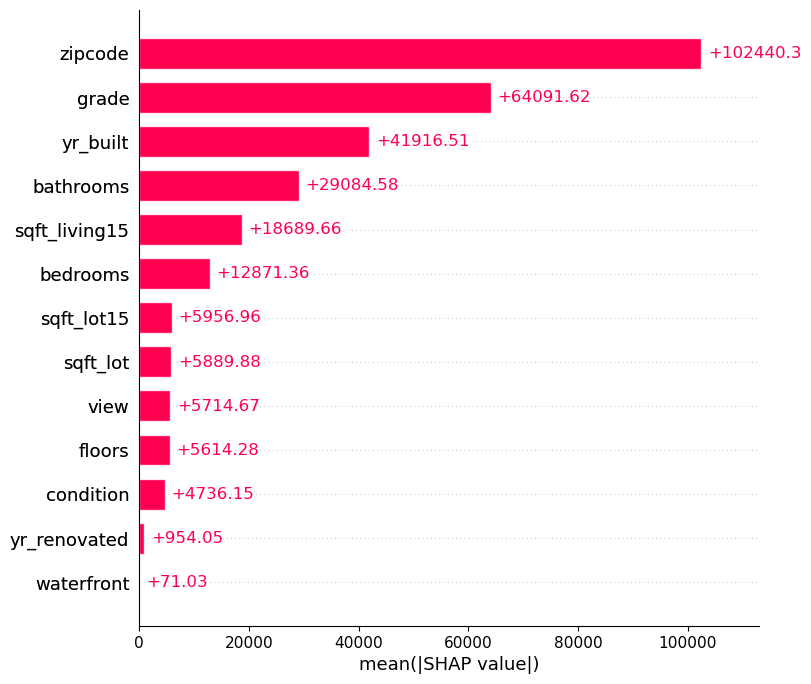

In [15]:
feature_importance(regression_model, X_test)

## Model Diagnostics Check

### Autocorrelation Check
The autocorrelation function is used to check for the presence of autocorrelation. The ACF plot clearly shows that the model does not suffer from 
autocorrelation in its residuals as every lag beyond the first lag is very close to zero.

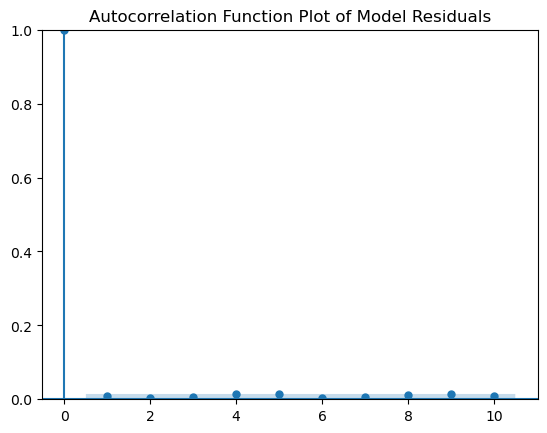

In [16]:
# Plot Model Residual Autocorrelation Function
acf_plot(est)

### Heteroskedasticity check
The Lagrange multiplier statistic for the Breusch-Pagan Test is 1905.144 and the corresponding p-value is 0. Because this p-value is way less than 0.05, we reject the null hypothesis. Consequently, there is heteroscedasticity is present in the regression model. However, this can be dealt with by employing heteroskedastic variance -ccovariance matrix when refitting the model.

In [17]:
# Perform Bresuch-Pagan test
labels = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f (p-value)']
test = diag.het_breuschpagan(est.resid, X_model, robust = True)

lzip(labels, test)

[('Lagrange multiplier statistic', 1905.1447322090166),
 ('p-value', 0.0),
 ('f-value', 163.14732483751516),
 ('f (p-value)', 0.0)]

### Normality Check
The model QQ-Plot follows the diagonal line in the plot and mean of residuals are very close to zero, indicating that the
model errors are normally distributed. 

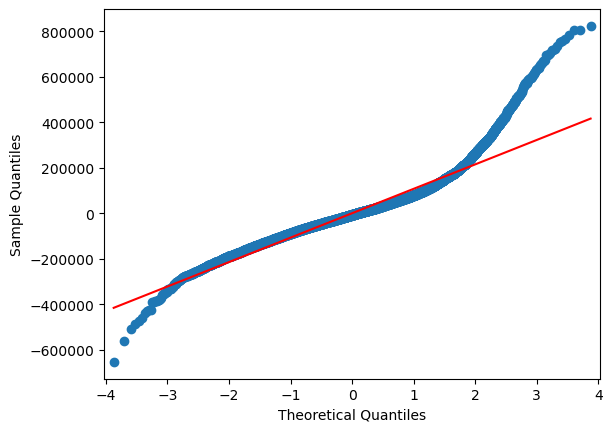

-7.906808727800094e-06

In [18]:
# Check for the normality
norm_plot(est)

# Check that the mean of the residual = 0
mean_residuals = sum(est.resid) / len(est.resid)
mean_residuals

## Save Price Prediction Model

In [19]:
# Pickle the Model
with open('king-county-model.pkl', 'wb') as f:
    pickle.dump(regression_model, f)
    
# Load it back in (Post-saving for Making Predictions)
with open('king-county-model.pkl', 'rb') as pickle_file:
    regression_model_2 = pickle.load(pickle_file)